In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [168]:
df = pd.read_csv(r'StationaryFree.csv')
east = df['.UTM_easting']
north = df['.UTM_northing']
print(rsme(east))
print(rsme(north))
print(error_bounds('.UTM_easting'))
print(error_bounds('.UTM_northing'))

df[".UTM_easting"] = ((df[".UTM_easting"] - 328114)*1000)-710-65
df[".UTM_northing"] = ((df[".UTM_northing"] - 4689442)*1000)-700-65
print(df)

0.006789429078818692
0.00475881686958611
upper bound : 0.005992384103592485
mean: 328114.79462474334
lower bound : 0.022376761946361512
None
upper bound : 0.01746137160807848
mean: 4689442.782867427
lower bound : 0.019215842708945274
None
                           time  .Header.seq  .Header.stamp.secs  \
0    2022/10/06/18:46:48.033698            0               82008   
1    2022/10/06/18:46:49.052293            0               82009   
2    2022/10/06/18:46:50.028174            0               82010   
3    2022/10/06/18:46:51.051409            0               82011   
4    2022/10/06/18:46:52.029393            0               82012   
..                          ...          ...                 ...   
604  2022/10/06/18:56:52.014369            0               82612   
605  2022/10/06/18:56:53.036086            0               82613   
606  2022/10/06/18:56:54.012945            0               82614   
607  2022/10/06/18:56:55.038642            0               82615   
608  2022/10/

In [169]:
east = df['.UTM_easting']
north = df['.UTM_northing']
alt = df['.Altitude']
time = df['.Header.stamp.secs']
mean1 = np.mean(df['.UTM_easting'])
mean2 = np.mean(df['.UTM_northing'])
print(mean1)
print(mean2)

19.624743329579765
17.86742775017405


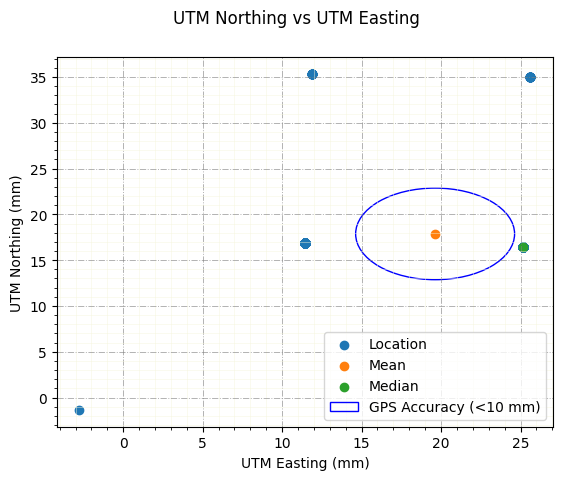

In [170]:
fig = plt.figure()
ax = plt.axes()
fig.suptitle('UTM Northing vs UTM Easting', fontsize=12)
circle2 = plt.Circle((mean1, mean2), 5, color='b', fill=False, label='GPS Accuracy (<10 mm)')
one = ax.scatter(east, north, label='Location')
two = ax.scatter(mean1,mean2, label='Mean')
three = ax.scatter(25.163008, 16.484822, label = 'Median')
plt.legend(handles=[one, two, three, circle2], loc='lower right')
plt.xlabel('UTM Easting (mm)', fontsize=10)
plt.ylabel('UTM Northing (mm)', fontsize=10)
#major grid lines
plt.grid(visible=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=0.7)
#minor grid lines
plt.minorticks_on()
ax.add_patch(circle2)
plt.grid(visible=True, which='minor', color='beige', alpha=0.8, ls='-', lw=0.4)
plt.show()


In [171]:
def rsme (column_name):
 column = np.mean(column_name)
 column_rsme = np.sqrt(np.square(column_name - column).mean())
 return column_rsme

In [172]:
def error_bounds (column_name):
 column=df[column_name].tolist()
 mean = np.mean(column) 
 u = max(column) - np.mean(column)
 l = np.mean(column)  - min(column)
 print(f'upper bound : {u}')
 print(f'mean: {mean}')
 print(f'lower bound : {l}')

In [173]:
print(rsme(east))
print(rsme(north))

6.789429078818693
4.758816869586048


In [174]:
print(error_bounds('.UTM_easting'))
print(error_bounds('.UTM_northing'))

upper bound : 5.992384116877979
mean: 19.624743329579765
lower bound : 22.37676193307602
None
upper bound : 17.46137084191656
mean: 17.86742775017405
lower bound : 19.215843475107196
None
